In [ ]:
pip install pandas

Figures:

Saving labeled_refactor_prs (2).csv to labeled_refactor_prs (2) (11).csv
Saving other_refactor_with_agent_and_category.csv to other_refactor_with_agent_and_category (11).csv


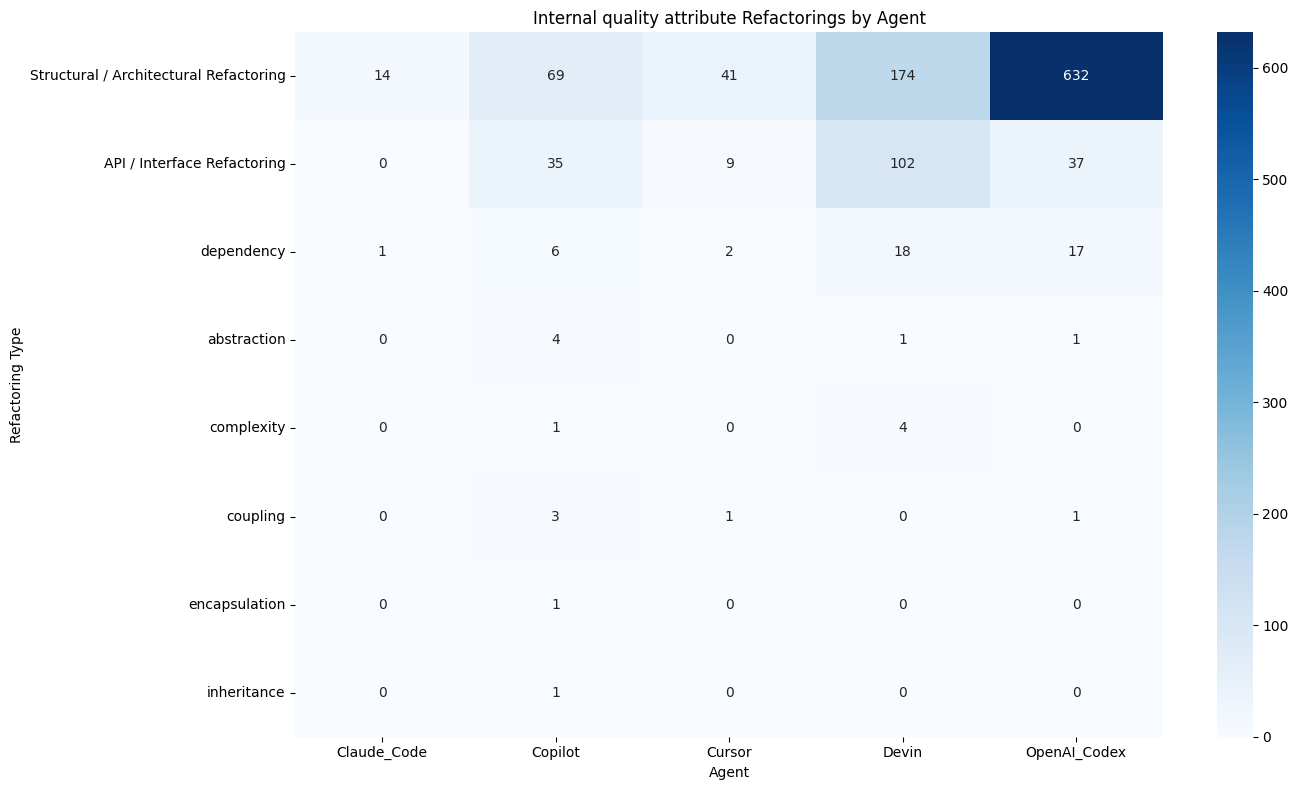

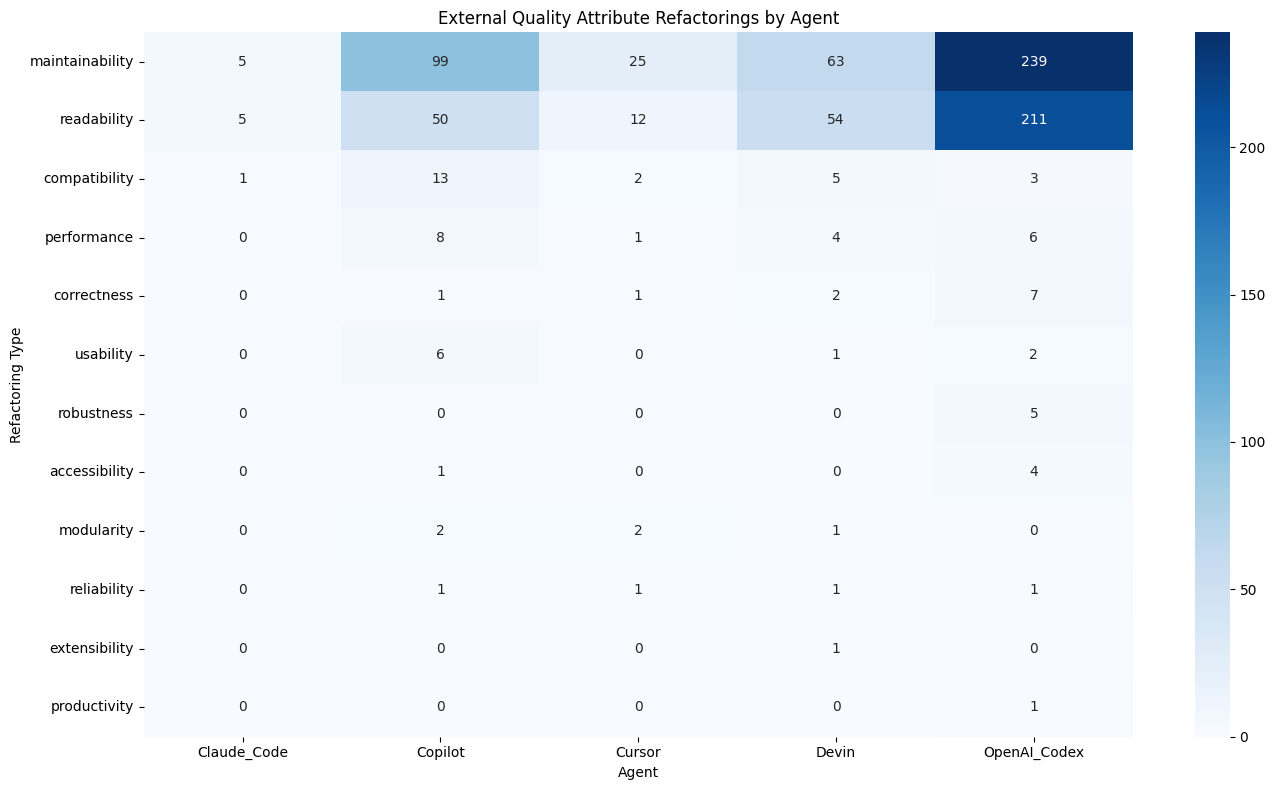

KeyError: "['Claude_Code', 'Copilot'] not in index"

<Figure size 1400x800 with 0 Axes>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

csv_files = ['other_refactor_with_agent_and_category.csv', 'labeled_refactor_prs (2).csv']
df_list = [pd.read_csv(fname) for fname in csv_files]
df = pd.concat(df_list, ignore_index=True)
df['category'] = df['category'].str.strip().str.lower()

agent_order = ['Claude_Code', 'Copilot', 'Cursor', 'Devin', 'OpenAI_Codex']
agent_colors = {
    'Claude_Code': '#6A1B9A',
    'Copilot': '#FFA726',
    'Cursor': '#388E3C',
    'Devin': '#D32F2F',
    'OpenAI_Codex': '#039BE5'
}
colors = [agent_colors[a] for a in agent_order if a in df['agent'].unique()]

for cat in ['internal quality attribute']:
    cat_df = df[df['category'] == cat]
    pivot = cat_df.pivot_table(
        index='refactor_type',
        columns='agent',
        aggfunc='size',
        fill_value=0
    )
    pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
    import seaborn as sns
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot[agent_order], annot=True, fmt="d", cmap="Blues")
    plt.title('Internal quality attribute Refactorings by Agent')
    plt.xlabel('Agent')
    plt.ylabel('Refactoring Type')
    plt.tight_layout()
    plt.show()


for cat in ['external quality attribute']:
    cat_df = df[df['category'] == cat]
    pivot = cat_df.pivot_table(
        index='refactor_type',
        columns='agent',
        aggfunc='size',
        fill_value=0
    )
    pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot[agent_order], annot=True, fmt="d", cmap="Blues")
    plt.title(f'{cat.title()} Refactorings by Agent')
    plt.xlabel('Agent')
    plt.ylabel('Refactoring Type')
    plt.tight_layout()
    plt.show()

    for cat in ['code smells']:
      cat_df = df[df['category'] == cat]
      pivot = cat_df.pivot_table(
          index='refactor_type',
          columns='agent',
          aggfunc='size',
          fill_value=0
    )
    pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot[agent_order], annot=True, fmt="d", cmap="Blues")
    plt.title(f'{cat.title()} Refactorings by Agent')
    plt.xlabel('Agent')
    plt.ylabel('Refactoring Type')
    plt.tight_layout()
    plt.show()












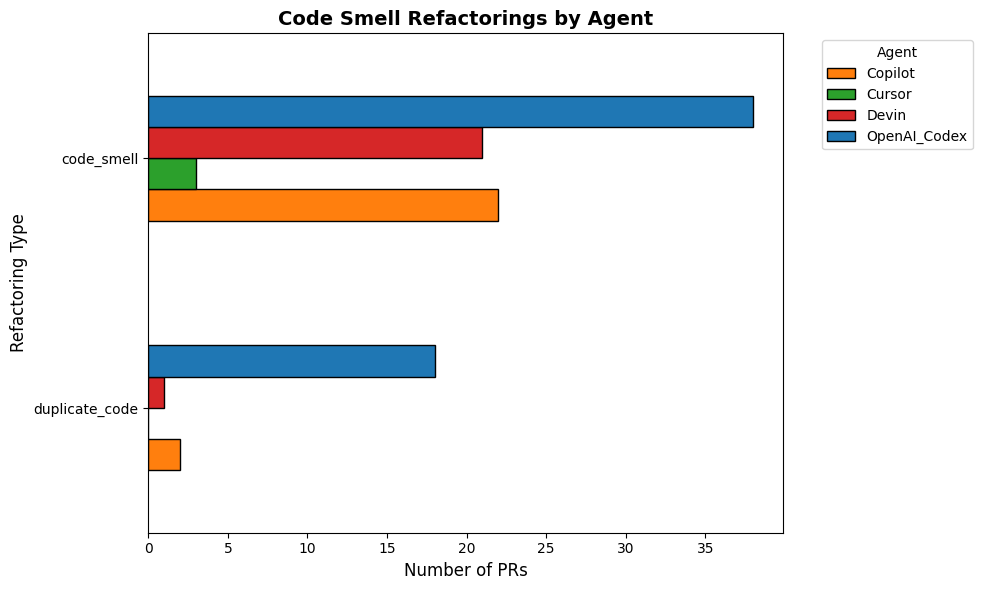

In [ ]:
import matplotlib.pyplot as plt

# 🧩 Define code smell categories
code_smells = {
    'code_smell': ['code smell', 'bad practice', 'cleanup'],
    'long_method': ['long method', 'large function', 'split method'],
    'duplicate_code': ['duplicate', 'redundant code', 'remove repetition', 'duplication']
    }

# 🎨 Define colors for each agent
agent_colors = {
    'OpenAI_Codex': '#1f77b4',
    'Copilot': '#ff7f0e',
    'Cursor': '#2ca02c',
    'Devin': '#d62728',
    'Claude_Code': '#9467bd'
}

# 🧮 Recreate grouped data WITH agent
refac_type_counts_agent = refactor_prs.groupby(['agent_x', 'refactor_type']).size().reset_index(name='count')

# Filter only code smell categories
smell_df = refac_type_counts_agent[refac_type_counts_agent['refactor_type'].isin(code_smells)]

# 🧩 Pivot for plotting
pivot_smell = smell_df.pivot(index='refactor_type', columns='agent_x', values='count').fillna(0)
pivot_smell = pivot_smell.loc[pivot_smell.sum(axis=1).sort_values(ascending=True).index]

# 📊 Plot grouped horizontal bars for code smell refactorings
pivot_smell.plot(
    kind='barh',
    figsize=(10, 6),
    color=[agent_colors.get(agent, '#333333') for agent in pivot_smell.columns],
    edgecolor='black'
)

plt.xlabel("Number of PRs", fontsize=12)
plt.ylabel("Refactoring Type", fontsize=12)
plt.title("Code Smell Refactorings by Agent", fontsize=14, fontweight='bold')
plt.legend(title="Agent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
from google.colab import files
from bs4 import BeautifulSoup


internal_qa = [
    'dependency', 'inheritance', 'composition', 'abstraction',
    'coupling', 'encapsulation', 'polymorphism', 'complexity'
]

external_qa = [
    'readability', 'usability', 'performance', 'maintainability', 'flexibility',
    'reusability', 'accessibility', 'modularity', 'extensibility', 'correctness',
    'manageability', 'robustness', 'compatibility', 'scalability', 'simplicity',
    'reliability', 'productivity', 'adaptability', 'understandability'
]

code_smells = ['code_smell', 'long_method', 'duplicate_code']


keywords = {
    **{k: [k] for k in internal_qa},
    **{k: [k] for k in external_qa},
    **{k: [k] for k in code_smells},
    'other': ['']
}

def classify_refactor_type(row):
    title = row['title_x'].lower() if isinstance(row['title_x'], str) else ''
    reason = row['reason'].lower() if isinstance(row['reason'], str) else ''
    for key, terms in keywords.items():
        if any(term in title or term in reason for term in terms):
            return key
    return 'other'

refactor_prs['refactor_type'] = refactor_prs.apply(classify_refactor_type, axis=1)
refactor_prs = refactor_prs[refactor_prs['refactor_type'] != 'other']

def get_category_group(ref_type):
    if ref_type in internal_qa:
        return 'Internal Quality'
    elif ref_type in external_qa:
        return 'External Quality'
    elif ref_type in code_smells:
        return 'Code Smell'
    else:
        return 'Other'

refactor_prs['category_group'] = refactor_prs['refactor_type'].apply(get_category_group)

def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, "html.parser").get_text()
        text = text.replace("\n", " ").replace("\r", " ").strip()
        return text
    return text


for col in ['title_x', 'body', 'reason']:
    if col in refactor_prs.columns:
        refactor_prs[col] = refactor_prs[col].apply(clean_text)


export_cols = ['id', 'title_x', 'body', 'agent_x', 'type', 'reason', 'refactor_type', 'category_group']

labeled_refactor_df = refactor_prs[export_cols].rename(columns={
    'title_x': 'title',
    'agent_x': 'agent'
})


labeled_refactor_df.to_csv('/content/labeled_refactor_prs.csv', index=False)
print("✅ Labeled dataset saved as 'labeled_refactor_prs.csv' with Internal / External / Code Smell groups!")
files.download('/content/labeled_refactor_prs.csv')



✅ Labeled dataset saved as 'labeled_refactor_prs.csv' with Internal / External / Code Smell groups!


/tmp/ipython-input-944474082.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refactor_prs['refactor_type'] = refactor_prs.apply(classify_refactor_type, axis=1)
/tmp/ipython-input-944474082.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refactor_prs['category_group'] = refactor_prs['refactor_type'].apply(get_category_group)
/tmp/ipython-input-944474082.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  action verbs in each PR


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import re
from collections import Counter

df = pd.read_csv('labeled_refactor_prs.csv ')

text = (df['title'].fillna('') + ' ' + df['reason'].fillna('')).str.lower()

verbs = [
    "rename","remove","split","extract","clean","simplify","optimize",
    "refactor","restructure","convert","migrate","replace","move",
    "unify","update","improve","reduce","fix"
]

pattern_counts = Counter()

for t in text:
    for v in verbs:
        if v in t:
            pattern_counts[v] += 1

pattern_counts.most_common(20)


FileNotFoundError: [Errno 2] No such file or directory: 'labeled_refactor_prs.csv '

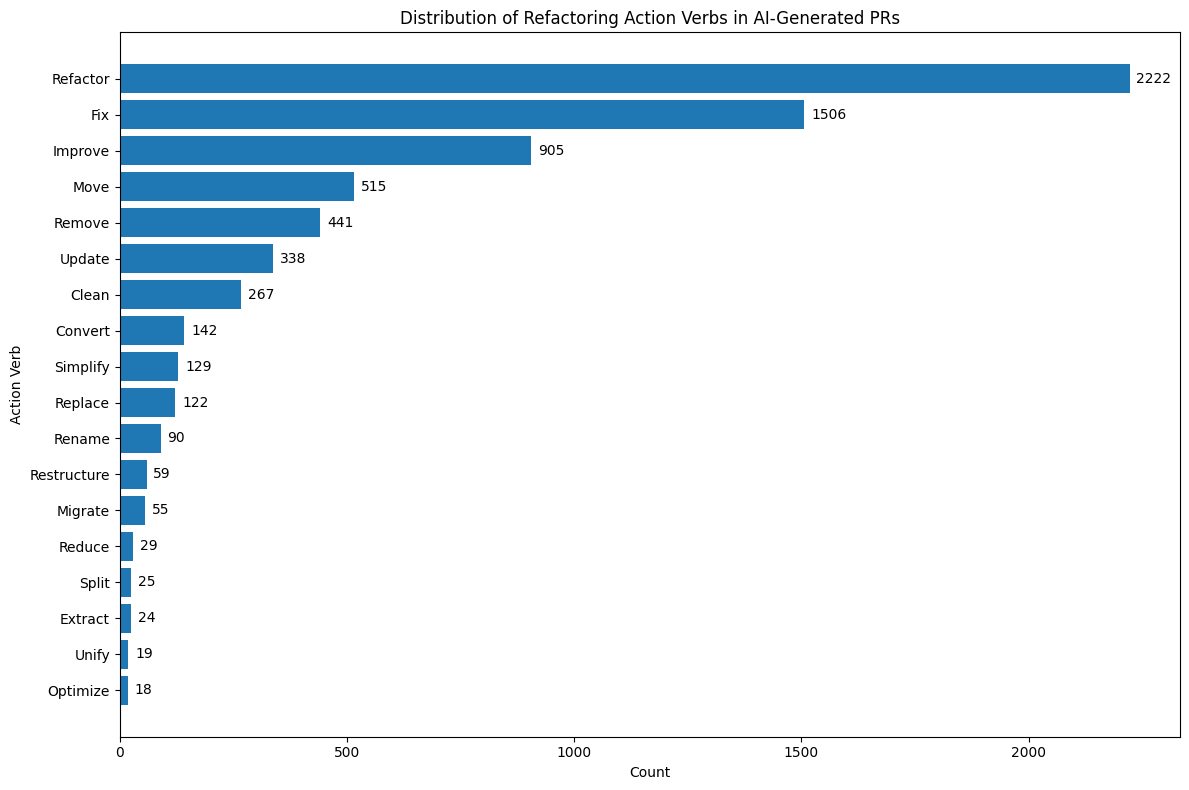

In [ ]:
import matplotlib.pyplot as plt

action_counts = {
    "Refactor": 2222, "Fix": 1506, "Improve": 905, "Move": 515, "Remove": 441,
    "Update": 338, "Clean": 267, "Convert": 142, "Simplify": 129,
    "Replace": 122, "Rename": 90, "Restructure": 59, "Migrate": 55,
    "Reduce": 29, "Split": 25, "Extract": 24, "Unify": 19, "Optimize": 18
}

verbs = list(action_counts.keys())
counts = list(action_counts.values())

plt.figure(figsize=(12, 8))
bars = plt.barh(verbs, counts)

# 🔢 Add the exact numbers next to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 15, bar.get_y() + bar.get_height()/2,
             str(int(width)),
             va='center', fontsize=10)

plt.xlabel("Count")
plt.ylabel("Action Verb")
plt.title("Distribution of Refactoring Action Verbs in AI-Generated PRs")
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()
